In [1]:
%matplotlib inline
from scipy.stats import rv_continuous
from scipy.special import gamma
import numpy as np
from numpy import exp, sqrt
from scipy.integrate import quad
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import matplotlib as mpl
import capLib as ca
import fdulib as vdf
import sys
import lmfit
from py_unsio import *
import pymc
import os
from pymodelfit import FunctionModel1DAuto

In [2]:

dmIC = vdf.Halo("/data/McMillan_model/output_00001.g2", "halo",
                  dens=True,simutokms=65.69,hsml=True,
                  center=[499.959,499.982,499.94]
               )
dmdensIC = vdf.Halo("/data/McMillan_model/output_00001.dm.dens.g2",
                    "all",dens=True,simutokms=65.69,hsml=True,
                    center=[499.959,499.982,499.94]
                   )

print "dm",len(dmIC.x)

dm 1668831


In [3]:
#### check center ####
print "x_max =",dmIC.x[np.where(dmdensIC.rho == np.max(dmdensIC.rho))][0]
print "y_max =",dmIC.y[np.where(dmdensIC.rho == np.max(dmdensIC.rho))][0]
print "z_max =",dmIC.z[np.where(dmdensIC.rho == np.max(dmdensIC.rho))][0]

x_max = -0.000488281
y_max = 0.000396729
z_max = 3.05176e-05


In [4]:

dmLR = vdf.Halo("/data/McMillan_model/output_00031.g2", "halo",
                  dens=True,simutokms=65.69,hsml=True,
                  center=[500.417,499.916,498.846]
               )
dmdensLR = vdf.Halo("/data/McMillan_model/output_00031.dm.dens.g2",
                    "all",dens=True,simutokms=65.69,hsml=True,
                    center=[500.417,499.916,498.846]
                   )

In [5]:
#### check center ####
print "x_max =",dmLR.x[np.where(dmdensLR.rho == np.max(dmdensLR.rho))][0]
print "y_max =",dmLR.y[np.where(dmdensLR.rho == np.max(dmdensLR.rho))][0]
print "z_max =",dmLR.z[np.where(dmdensLR.rho == np.max(dmdensLR.rho))][0]

x_max = 0.000152588
y_max = -0.000183105
z_max = -0.000274658


In [6]:
### get rings ##
dmdensIC.get_ring_xy(7.5,8.5,.5)
dmIC.get_ring_xy(7.5,8.5,.5)
dmLR.get_ring_xy(7.5,8.5,.5)
dmdensLR.get_ring_xy(7.5,8.5,.5)

In [7]:
min_IC = np.min(dmIC.vphi_ringXY)
max_IC = np.max(dmIC.vphi_ringXY)
n_IC = len(dmIC.vphi_ringXY)
n_LR = len(dmLR.vphi_ringXY)
print n_IC
bin_num = 15 
IC_array = np.arange(min_IC, max_IC,(max_IC - min_IC)/bin_num)
min_LR = np.min(dmLR.vphi_ringXY)
max_LR = np.max(dmLR.vphi_ringXY)
LR_array = np.arange(min_LR, max_LR,(max_LR - min_LR)/bin_num)

v_phi_IC = np.histogram(dmIC.vphi_ringXY,bins=IC_array,normed=True)
v_phi_LR = np.histogram(dmLR.vphi_ringXY,bins=LR_array,normed=True)

446


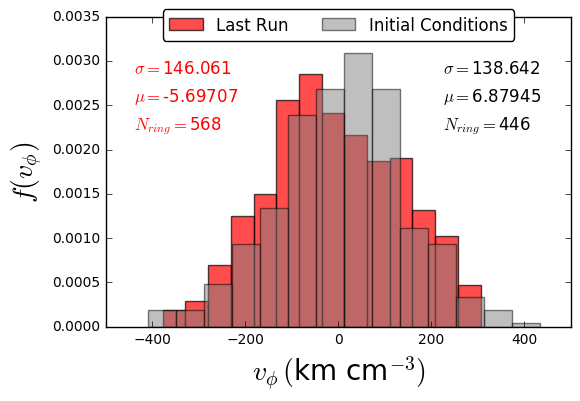

In [8]:
fig, ax = plt.subplots()
ax.set_xlabel(r'$v_{\phi}\,($km cm$^{-3})$',fontsize=20)
ax.set_ylabel(r'$f(v_{\phi})$',fontsize=20)

ax.bar(v_phi_LR[1][:-1],v_phi_LR[0],width =(max_LR - min_LR)/bin_num,
       color='red',alpha= .7,label="Last Run")
ax.bar(v_phi_IC[1][:-1],v_phi_IC[0],width =(max_IC - min_IC)/bin_num,
       color='gray',label="Initial Conditions",alpha= 0.5)
## text params
mu_IC = np.mean(dmIC.vphi_ringXY)
mu_LR = np.mean(dmLR.vphi_ringXY)
sigma_IC = np.sqrt(np.var(dmIC.vphi_ringXY))
sigma_LR = np.sqrt(np.var(dmLR.vphi_ringXY))
y_H_IC = np.max(v_phi_LR[0])
y_H_LR = np.max(v_phi_LR[0])
x_H_IC = np.max(v_phi_IC[1][:-1])
x_H_LR = np.min(v_phi_LR[1])
## 
ax.text(x_H_IC*3/5., y_H_IC, r'$\sigma=$'+str(sigma_IC), size = 12)#, color='gray')
ax.text(x_H_IC*3/5., y_H_IC*8/9., r'$\mu=$'+str(mu_IC), size = 12)#, color='gray')
ax.text(x_H_IC*3/5., y_H_IC*7/9., r'$N_{ring}=$'+str(n_IC), size = 12)#, color='gray')
ax.text(x_H_LR*7/6., y_H_IC, r'$\sigma=$'+str(sigma_LR), size = 12
        , color='red')
ax.text(x_H_LR*7/6., y_H_IC*8/9., r'$\mu=$'+str(mu_LR), size = 12
        , color='red')
ax.text(x_H_LR*7/6., y_H_IC*7/9., r'$N_{ring}=$'+str(n_LR), size = 12
        , color='red')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True)


In [9]:

dmIC = vdf.Halo("/data/McMillan_model/output_00001.g2", "stars",
                  dens=True,simutokms=65.69,hsml=True,
                  center=[499.959,499.982,499.94]
               )

dmLR = vdf.Halo("/data/McMillan_model/output_00031.g2", "stars",
                  dens=True,simutokms=65.69,hsml=True,
                  center=[500.417,499.916,498.846]
               )

In [10]:
dmIC.get_ring_xy(7.5,8.5,.5)
dmLR.get_ring_xy(7.5,8.5,.5)
min_IC = np.min(dmIC.vphi_ringXY)
max_IC = np.max(dmIC.vphi_ringXY)
n_IC = len(dmIC.vphi_ringXY)
n_LR = len(dmLR.vphi_ringXY)
print n_IC
bin_num = 30
IC_array = np.arange(min_IC, max_IC,(max_IC - min_IC)/bin_num)
min_LR = np.min(dmLR.vphi_ringXY)
max_LR = np.max(dmLR.vphi_ringXY)
LR_array = np.arange(min_LR, max_LR,(max_IC - min_IC)/bin_num)

v_phi_IC = np.histogram(dmIC.vphi_ringXY,bins=IC_array,normed=True)
v_phi_LR = np.histogram(dmLR.vphi_ringXY,bins=LR_array,normed=True)

69076


In [11]:
fig, ax = plt.subplots()
ax.set_xlabel(r'$v_{\phi}\,($km cm$^{-3})$',fontsize=20)
ax.set_ylabel(r'$f(v_{\phi})$',fontsize=20)

ax.bar(v_phi_LR[1][:-1],v_phi_LR[0],width =(max_IC - min_IC)/bin_num,
       color='red',alpha= .7,label="Last Run")
ax.bar(v_phi_IC[1][:-1],v_phi_IC[0],width =(max_IC - min_IC)/bin_num,
       color='gray',label="Initial Conditions",alpha= 0.5)
## text params
mu_IC = np.mean(dmIC.vphi_ringXY)
mu_LR = np.mean(dmLR.vphi_ringXY)
sigma_IC = np.sqrt(np.var(dmIC.vphi_ringXY))
sigma_LR = np.sqrt(np.var(dmLR.vphi_ringXY))
y_H_IC = np.max(v_phi_LR[0])
y_H_LR = np.max(v_phi_LR[0])
x_H_IC = np.max(v_phi_IC[1][:-1])
x_H_LR = np.min(v_phi_LR[1])
## 
ax.text(x_H_IC*3/5., y_H_IC*15/9., r'$\sigma=$'+str(sigma_IC), size = 12)#, color='gray')
ax.text(x_H_IC*3/5., y_H_IC*12/9., r'$\mu=$'+str(mu_IC), size = 12)#, color='gray')
ax.text(x_H_IC*3/5., y_H_IC, r'$N_{ring}=$'+str(n_IC), size = 12)#, color='gray')
ax.text(x_H_LR*7/6., y_H_IC*15/9., r'$\sigma=$'+str(sigma_LR), size = 12
        , color='red')
ax.text(x_H_LR*7/6., y_H_IC*12/9., r'$\mu=$'+str(mu_LR), size = 12
        , color='red')
ax.text(x_H_LR*7/6., y_H_IC, r'$N_{ring}=$'+str(n_LR), size = 12
        , color='red')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True)


In [12]:
print "stars",len(dmIC.x)

stars 1746746
